## mse budget

Developent of mse

$\frac{1}{2} \hat{\frac{\delta {h ^ \prime} ^2}{\delta t}} = \hat{h^ \prime} \ \text{NetLW} ^ \prime + \hat{h^ \prime} \ \text{SEF} ^ \prime + \hat{h^ \prime} \ \text{NetSW} ^ \prime - \hat{h^ \prime} \ \nabla_{h}\cdot \hat{\overrightarrow{u}h}$


In [1]:
import xarray as xr

import numpy as np
import skimage.measure as skm
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import os
from cmip6_metrics.funcs import myPlots

In [2]:
model='MPI-ESM1-2-HR'
experiment_id='historical'
folder = '/Users/cbla0002/Documents/data/cmip6/' + model

## mse

### snapshots of components

In [ ]:
fileName = model + '_mse_example_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds_example = xr.open_dataset(path)

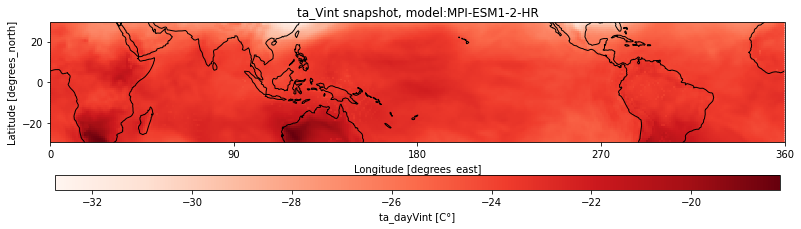

In [ ]:
myPlots.plot_snapshot(ds_example.ta_dayVint, 'Reds', 'ta_Vint', model)

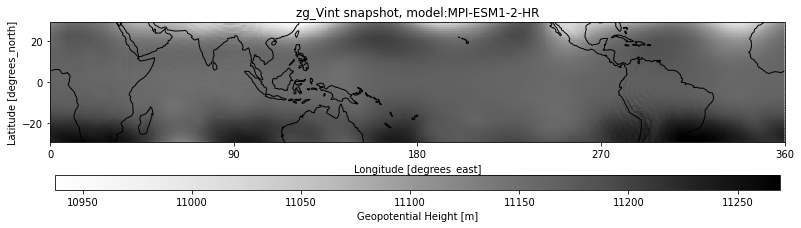

In [ ]:
myPlots.plot_snapshot(ds_example.zg_dayVint, 'Greys', 'zg_Vint', model)

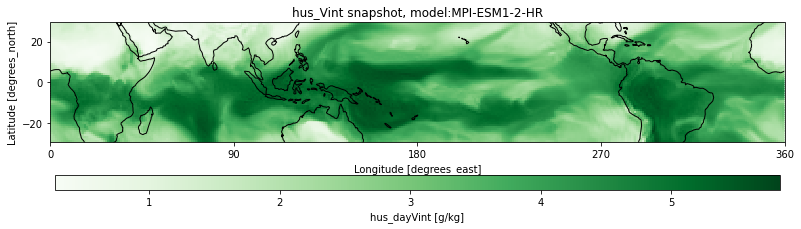

In [ ]:
myPlots.plot_snapshot(ds_example.hus_dayVint, 'Greens', 'hus_Vint', model)

### mse anomaly

In [3]:
fileName = model + '_mse_vInt_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:   (time: 10927, lat: 64, lon: 384)
Coordinates:
  * time      (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
  * lat       (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon       (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Data variables:
    mse_vInt  (time, lat, lon) float64 ...

In [4]:
mse = ds.mse_vInt

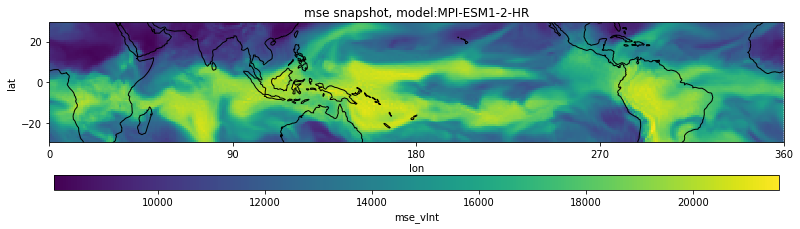

In [5]:
myPlots.plot_snapshot(mse.isel(time=0), 'viridis', 'mse', model)

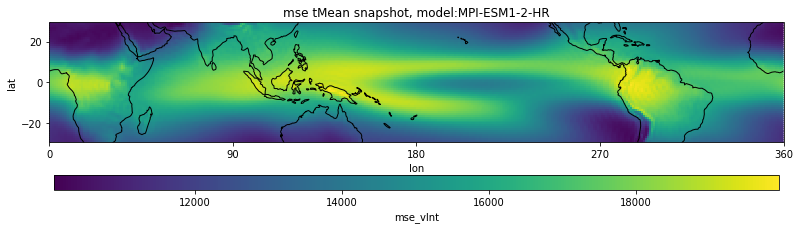

In [6]:
myPlots.plot_snapshot(mse.mean(dim='time'), 'viridis', 'mse tMean', model)

In [7]:
mse_mean = mse.mean(dim=('lat','lon'))
print(np.shape(mse_mean))

(10927,)


In [8]:
mse_anom = mse - mse_mean
print(np.shape(mse_anom))

(10927, 64, 384)


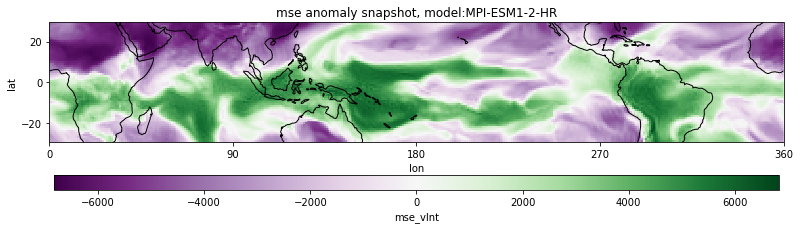

In [41]:
myPlots.plot_snapshot(mse_anom.isel(time=0), 'PRGn', 'mse anomaly', model)

In [10]:
mse_anomSqrd = mse_anom**2

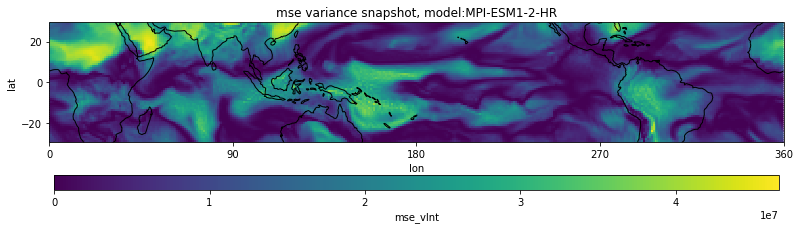

In [11]:
myPlots.plot_snapshot(mse_anomSqrd.isel(time=0), 'viridis', 'mse variance', model)

In [12]:
dmse = mse_anomSqrd.isel(time=slice(1,None)).data-mse_anomSqrd.isel(time=slice(0,-1)).data
np.shape(dmse)

(10926, 64, 384)

In [13]:
dmse = xr.DataArray(
    data=dmse,
    dims=['time', 'lat', 'lon'],
    coords={'time': mse_anomSqrd.time.data[0:-1], 'lat': mse_anomSqrd.lat.data, 'lon': mse_anomSqrd.lon.data},
    attrs={'units':''}
    )

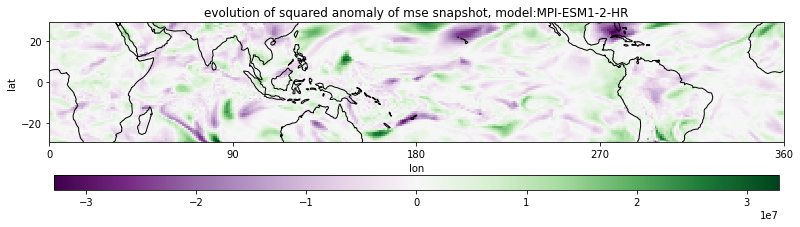

In [14]:
myPlots.plot_snapshot(dmse.isel(time=0), 'PRGn', 'evolution of squared anomaly of mse', model)

In [15]:
np.shape(mse_anomSqrd)

(10927, 64, 384)

In [16]:
mse_varMean = mse_anomSqrd.mean(dim=('lat','lon'))

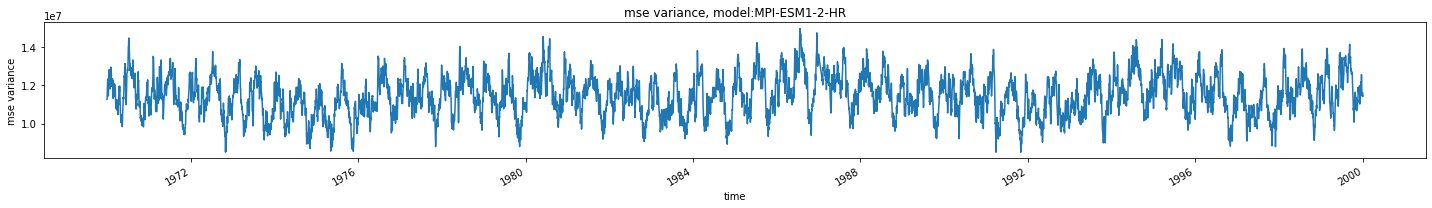

In [17]:
f, ax = plt.subplots(figsize=(20, 3))
mse_varMean.plot()
ax.set_title('mse variance, model:' + model)
ax.set_ylabel('mse variance')
plt.tight_layout()

## lw

In [19]:
fileName = model + '_netlw_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 384, time: 10957)
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 1999-12-31
Data variables:
    netlw    (time, lat, lon) float32 ...

In [36]:
netlw = ds.netlw

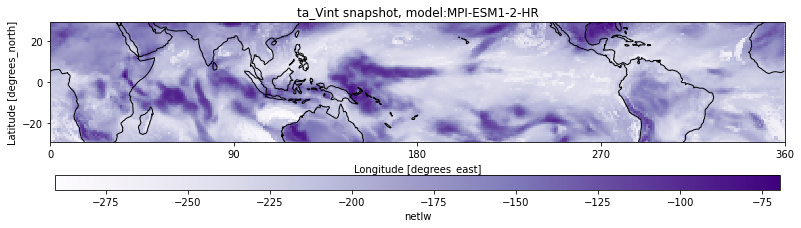

In [37]:
myPlots.plot_snapshot(netlw.isel(time=0), 'Purples', 'ta_Vint', model)

In [38]:
netlw_mean = netlw.mean(dim=('lat','lon'))
np.shape(netlw_mean)

(10957,)

In [39]:
netlw_anom = netlw - netlw_mean
np.shape(netlw_anom)

(10957, 64, 384)

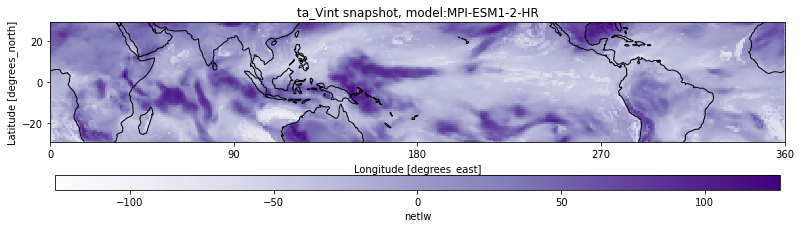

In [40]:
myPlots.plot_snapshot(netlw_anom.isel(time=0), 'Purples', 'ta_Vint', model)

In [43]:
netlw_corr = netlw_anom * mse_anom

ValueError: operands could not be broadcast together with shapes (10957,64,384) (10927,64,384) 

In [32]:
myPlots.plot_snapshot(netlw_corr.isel(time=0), 'Purples', 'ta_Vint', model)

IndexError: index 0 is out of bounds for axis 0 with size 0